Importa o modelo a ser fatiado e mapeado

In [1]:
import matplotlib.pyplot as plt
import gui
import files
from timer import Timer
from components.layer import Layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
choice = gui.ask_load_or_begin()
if choice == "Novo Projeto":
    path_input, file_name = gui.load_model(folders)
    [dpi, layer_height] = gui.ask_parameters_input()
    with Timer("Fase 0: "):
        Layer.create_layers(folders, path_input, file_name, dpi, layer_height)
elif choice == "Carregar Salvo":
    gui.find_saved_file(folders)
elif choice == "Cancelar":
    quit

#TODO: encontrar uma forma de jogar layerHight para o slicing W/images (POSSIVELMENTE COM O RUNSINGLEMODEL)

Fase 0: 
criando as camadas
Total de [criando as camadas] : 0.3231837749481201
salvando as camadas
Total de [salvando as camadas] : 0.07285165786743164
Total de [Fase 0: ] : 0.396348237991333


Paredes Finas

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[nozzle_diam_internal,nozzle_diam_external] = gui.ask_parameters_thin_walls()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 1: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_thin_walls(folders, nozzle_diam_external, nozzle_diam_internal)
        %reset_selective -f "c"
%reset_selective -f "camadas"
# TODO: arvore de paredes finas
# TODO: quando duas áreas se encontram
# TODO: limite de parede diam minimo
# TODO: anotar todos os (não fechou contorno)
# TODO arrumar para origens extremamente pequenas, ignorar da problema
# TODO arrumar casos onde a beirada esta vazndo criando areas triangulares distantes
# FIXME: Precisa mesmo separar linha 1 2 topo e baixo? muitos elementos estão sendo criados

Fase 1: Camada: 0
Criando paredes finas
OK: fechou contorno
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.3973402976989746
Retirando Paredes finas da camada
Total de [Retirando Paredes finas da camada] : 0.0743865966796875
Total de [Criando paredes finas] : 11.125525951385498
Total de [Fase 1: Camada: 0] : 11.14577341079712


Contornos

In [3]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[void_max,internal_max,external_max] = gui.ask_parameters_offsets()
camadas = folders.load_layers_hdf5()
for i,c in enumerate(camadas):
    with Timer("Fase 2: Camada: " + str(i)):
        folders.load_islands_hdf5(c)
        c.make_offsets(folders, void_max, external_max, internal_max)
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 2: Camada: 0
Criando Lvls
Ilha: I_000 Número de Níveis: 10
Total de [Criando Lvls] : 5.870182275772095
Criando os loops
Total de [Criando os loops] : 4.816992282867432
Criando regiões de influência
Total de [Criando regiões de influência] : 0.952455997467041
Criando as regiões de Offset
Total de [Criando as regiões de Offset] : 6.253503084182739
Retirando regiões da camada
['Lvl_000', 0, 0] Perdendo total:202 maior void:0.050188205771643665Bw -> aceito
['Lvl_001', 0, 0] Perdendo total:206 maior void:0.17565872020075282Bw -> aceito
['Lvl_002', 0, 0] Perdendo total:80826 maior void:56.14930991217064Bw -> bloqueado
['Lvl_000', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_002', 1, 0] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 1] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_000', 1, 2] Perdendo total:0 maior void:0Bw -> aceito
['Lvl_001', 1, 

Pontes

In [4]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd
import numpy as np

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[n_max, nozzle_diam_internal] = gui.ask_parameters_bridges()
camadas = folders.load_layers_hdf5()
last_prohibited_areas = np.zeros(camadas[0].base_frame)
for i,c in enumerate(camadas):
    with Timer("Fase 3: Camada: " + str(i)):
        c.prohibited_areas = last_prohibited_areas
        last_prohibited_areas = c.make_bridges(n_max, nozzle_diam_internal, folders, len(camadas))
        folders.save_props_hdf5(f"/{c.name}",c.__dict__)
        # %reset_selective -f "c" 
# %reset_selective -f "camadas"

Fase 3: Camada: 0
Criando pontes de Offset
Total de [Criando pontes de Offset] : 22.5032901763916
Criando pontes de Zigzag
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
[3#mFechou uma ponte OK
Total de [Criando pontes de Zigzag] : 20.700194835662842
Criando pontes de Crossover
Elemento: ('Reg_001', 'Reg_002') Maior prioridade: 0
Elemento: ('Reg_000', 'Reg_002') Maior prioridade: 1
Elemento: ('Reg_000', 'Reg_003') Maior prioridade: 2
Total de [Criando pontes de Crossover] : 0.1956183910369873
Retirando pontes da Camada
Total de [Retirando pontes da Camada] : 0.04013323783874512
Gerando áreas proibidas
Total de [Gerando áreas proibidas] : 0.004765033721923828
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.9508814811706543
Total de [Fase 3: Camada: 0] : 44.56130909919739


Zigzags

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        c.make_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"


Fase 4: Camada: 0
Encontrando areas monotonicas
Total de [Encontrando areas monotonicas] : 6.994661569595337
salvando imagens das regiões
Total de [salvando imagens das regiões] : 0.11662101745605469
Total de [Fase 4: Camada: 0] : 7.860005617141724


Fase 4: Camada: 0


Total de [Fase 4: Camada: 0] : 1.2179656028747559


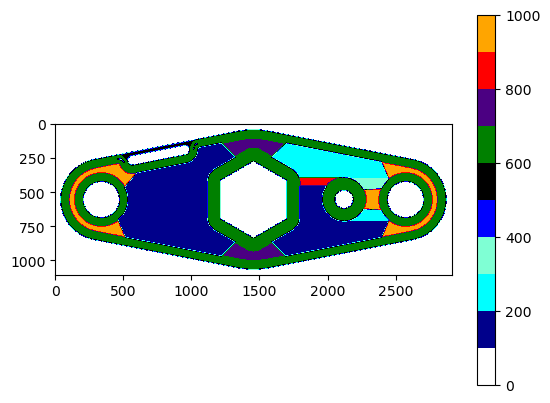

In [6]:
import gui
import files
from timer import Timer
from components import images_tools as it
from os import getcwd
import matplotlib.pyplot as plt
import matplotlib.colors
import os

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5() 
for c in camadas:
    folders.load_islands_hdf5(c)
tangran_cmap = matplotlib.colors.ListedColormap(["white","darkblue","aqua","aquamarine","blue","black","green","indigo","red","orange"])
for i, c in enumerate(camadas):
    with Timer("Fase 4: Camada: " + str(i)):
        plt.figure()
        img_mapping = it.final_mapping(c, folders)
        plt.imshow(img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.imsave("aaa.png",img_mapping, cmap=tangran_cmap, vmin=0, vmax=1000)
        plt.colorbar()
        print('\n')

ROTAS

Rotas de Offset

In [16]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

amendment_size = 0.7 #porcentagem do tamanho da poca de deposicao de material
for c in camadas:
    with Timer("Making offset routes"):
        c.make_offset_routes(amendment_size, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making offset routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.3390634059906006
Value(False)
Value(False)
Value(False)
Value(False)
Value(False)
Value(False)
Total de [Making offset routes] : 22.75354766845703


Rotas de pontes

In [5]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making bridges routes"):
        c.make_bridges_routes(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Making bridges routes


Value(False)
salvando imagens das rotas
Total de [salvando imagens das rotas] : 10.716322898864746
Total de [Making bridges routes] : 337.6859459877014


Rotas de Ziguezague

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Making zigzag routes"):
        c.make_zigzag_routes(folders)
        c.connect_zigzags(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"



Making zigzag routes
criando as rotas de zigzag, camada:L_000
fazendo as tres opções:
Total de [fazendo as tres opções:] : 24.528483152389526
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.3931736946105957
fazendo as tres opções:
Total de [fazendo as tres opções:] : 20.895511627197266
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.3887031078338623
fazendo as tres opções:
Total de [fazendo as tres opções:] : 0.06331014633178711
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.15615391731262207
fazendo as tres opções:
Total de [fazendo as tres opções:] : 21.27086329460144
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.3882608413696289
fazendo as tres opções:
Total de [fazendo as tres opções:] : 0.06493902206420898
escolhendo entre elas:
Total de [escolhendo entre elas:] : 0.15131139755249023
Total de [criando as rotas de zigzag, camada:L_000] : 73.7075080871582
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.53463

In [1]:
#WEAVING

import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
[iwflag] = gui.ask_parameters_weaving()
for c in camadas:
    with Timer("Fase 5 b"):
        c.internal_weaving(iwflag, folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5 b
gerando preenchimentos oscilatórios
Pegando as falhas internas
Total de [Pegando as falhas internas] : 7.192253112792969
Achando os contatos
Value(False)
Total de [Achando os contatos] : 208.84750247001648
criando os weavings
Total de [criando os weavings] : 9.064448833465576
Total de [gerando preenchimentos oscilatórios] : 236.92676639556885
salvando rotas
Total de [salvando rotas] : 0.4866471290588379
Total de [Fase 5 b] : 237.42087388038635


Rotas de Thin Walls

In [2]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()
for c in camadas:
    with Timer("Fase 5"):
        with Timer("Making thin walls routes"):
            c.make_thin_wall_routes(folders)
            %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 5
Making thin walls routes
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.17870092391967773
Total de [Making thin walls routes] : 1.5016710758209229
Total de [Fase 5] : 1.502380132675171


Unificando rotas EXTERNAS nas camadas

In [3]:
import gui
import files
from timer import Timer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 6"):
        c.close_routes_external(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"
    

Fase 6
Conectando rotas externas
Encontrando ponto de união ext-int
33
Total de [Encontrando ponto de união ext-int] : 1.7397608757019043
Conectando pontes de Offset
Total de [Conectando pontes de Offset] : 14.128728866577148
Conectando pontes de Crossover
salto:  [402, 2478]
salto:  [704, 438]
salto:  [510, 2261]
Total de [Conectando pontes de Crossover] : 15.18117094039917
Total de [Conectando rotas externas] : 34.619484663009644
salvando imagens das rotas
Total de [salvando imagens das rotas] : 1.0825586318969727
Total de [Fase 6] : 35.71172475814819


Unificando rotas INTERNAS nas camadas

In [4]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 7"):
        c.close_routes_internal(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 7
Conectando zgzags vizinhos
Total de [Conectando zgzags vizinhos] : 50.56044793128967
Conectando pontes de zigzag
salto:  [226, 1640]
salto:  [925, 1651]
Total de [Conectando pontes de zigzag] : 9.25621747970581
salvando imagens das rotas
Total de [salvando imagens das rotas] : 1.1145777702331543
Total de [Fase 7] : 63.93396258354187


Unindo rotas de thin walls

In [5]:
import gui
import files
from timer import Timer
from components import layer
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
camadas = folders.load_layers_hdf5()

for c in camadas:
    with Timer("Fase 8"):
        c.close_routes_thinwalls(folders)
        %reset_selective -f "c"
%reset_selective -f "camadas"

Fase 8
Convertendo paredes finas
Total de [Convertendo paredes finas] : 9.660754442214966
salvando imagens das rotas
Total de [salvando imagens das rotas] : 0.40848493576049805
Total de [Fase 8] : 10.891726970672607


Unindo todas as rotas e criando codigo G

In [6]:
import gui
import files
from timer import Timer
from components import layer, path_tools
from os import getcwd

if not('folders' in globals()):
    home = getcwd()
    folders = files.System_Paths(home)
    gui.find_saved_file(folders)
[vel_int, vel_ext, vel_thin_wall] = gui.ask_parameters_Gcode()
camadas = folders.load_layers_hdf5()

internal_trees = []
external_trees = []
tw_trees = []
for c in camadas:
    folders.load_islands_hdf5(c)
    for isl in c.islands:
        folders.load_island_paths_hdf5(c.name, isl)
        
for c in camadas:
    c.close_final_path(folders)
    for isl in c.islands:
        internal_trees.append([list(x) for x in isl.internal_tree_route.sequence])
        external_trees.append([list(x) for x in isl.external_tree_route.sequence])
        tw_trees.append([list(x) for x in isl.thinwalls_tree_route.sequence])

with Timer("Cuspindo o Gcode"):
    path_tools.layers_to_Gcode(camadas, 
                               folders, 
                               vel_int,
                               vel_ext, 
                               vel_thin_wall, 
                               internal_trees,
                               external_trees,
                               tw_trees,
                               )
%reset_selective -f "camadas"

Conectando ambas as partes
Total de [Conectando ambas as partes] : 0.09260225296020508
Cuspindo o Gcode
trocou para 1
trocou para 0
trocou para 2
Total de [Cuspindo o Gcode] : 7.550546407699585


In [7]:
import numpy as np
camadas = folders.load_layers_hdf5()
for c in camadas:
    folders.load_islands_hdf5(c)
    for isl in c.islands:
        folders.load_island_paths_hdf5(c.name, isl)
        internal_trees = [list(x) for x in isl.internal_tree_route.sequence]
        print(internal_trees)
print([235,807] in internal_trees)

[[255, 1277], [254, 1277], [253, 1277], [252, 1277], [251, 1277], [250, 1277], [249, 1277], [248, 1277], [247, 1277], [246, 1277], [245, 1277], [244, 1277], [243, 1277], [242, 1277], [241, 1277], [240, 1277], [239, 1277], [238, 1277], [237, 1277], [236, 1277], [235, 1277], [234, 1277], [233, 1277], [232, 1277], [231, 1277], [230, 1277], [229, 1277], [228, 1277], [227, 1277], [226, 1277], [225, 1277], [224, 1276], [224, 1275], [224, 1274], [224, 1273], [224, 1272], [224, 1271], [224, 1270], [224, 1269], [224, 1268], [224, 1267], [224, 1266], [224, 1265], [224, 1264], [224, 1263], [224, 1262], [223, 1261], [222, 1261], [221, 1261], [220, 1261], [219, 1261], [218, 1261], [217, 1261], [216, 1261], [215, 1261], [214, 1261], [213, 1261], [212, 1261], [211, 1261], [210, 1261], [209, 1261], [208, 1261], [207, 1261], [206, 1261], [205, 1261], [204, 1261], [203, 1261], [202, 1261], [201, 1261], [200, 1261], [199, 1261], [198, 1261], [197, 1261], [196, 1260], [197, 1259], [198, 1259], [199, 1259]

In [8]:
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# import numpy as np

# # Lista de imagens binárias (exemplo com arrays numpy)
# imagens = [
#     img_mapping,
#     img_mapping,
#     img_mapping
# ]

# # Lista de alturas no eixo z
# alturas = [0, 10, 20]

# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')

# for img, z in zip(imagens, alturas):
#     x = np.linspace(0, img.shape[1], img.shape[1])
#     y = np.linspace(0, img.shape[0], img.shape[0])
#     x, y = np.meshgrid(x, y)
#     z = np.full_like(x, z)
#     ax.plot_surface(x, y, z, rstride=1, cstride=1, facecolors=plt.cm.gray(img), shade=False)

# ax.set_xlabel('X')
# ax.set_ylabel('Y')
# ax.set_zlabel('Z')
# plt.show()


In [9]:
# import gui
# import files
# from timer import Timer
# from components import layer, path_tools
# from os import getcwd

# if not('folders' in globals()):
#     home = getcwd()
#     folders = files.System_Paths(home)
#     gui.find_saved_file(folders)
# camadas = folders.load_layers_hdf5()

# file_name = gui.find_saved_file(folders)
# path_tools.layers_to_Gcode_FFF(camadas, folders, file_name)